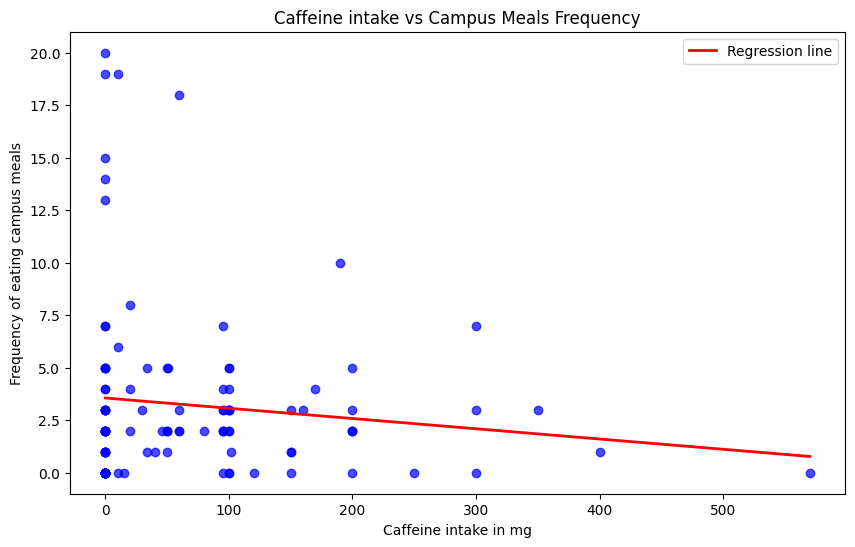

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("responses.csv")

Caffeine_mg  = [col for col in df.columns if "caffeine" in col.lower()]
Campus_Meals = [col for col in df.columns if "substantial" in col.lower()]
Diet_Rating  = [col for col in df.columns if "diet" in col.lower()]

if Caffeine_mg:  df.rename(columns={Caffeine_mg[0]: 'Caffeine_mg'}, inplace=True)
if Campus_Meals: df.rename(columns={Campus_Meals[0]: 'Campus_Meals'}, inplace=True)
if Diet_Rating:  df.rename(columns={Diet_Rating[0]: 'Diet_Rating'}, inplace=True)

for col in ['Caffeine_mg', 'Campus_Meals', 'Diet_Rating']: df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['Caffeine_mg', 'Campus_Meals', 'Diet_Rating'])

# Scatter plot graphing
plt.figure(figsize=(10,6))
plt.scatter(df['Caffeine_mg'], df['Campus_Meals'], alpha=0.7, color='blue')

# Linear regression line -- shows that there is negative correlation between the two.
slope, intercept = np.polyfit(df['Caffeine_mg'], df['Campus_Meals'], 1)
x_vals = np.array([df['Caffeine_mg'].min(), df['Caffeine_mg'].max()])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Regression line')

plt.xlabel("Caffeine intake in mg")
plt.ylabel("Frequency of eating campus meals")
plt.title("Caffeine intake vs Campus Meals Frequency")
plt.legend()
plt.show()